
 # Details
 Name: Sreenidhi Iyengar Munimadugu <br> <br>
 USC ID : 7710418375 <br> <br>
 GithHub Username : munimadu 



<center><h1>Munimadugu_Sreenidhi Iyengar_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import scipy
from scipy.io import arff
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report

Get the Vertebral Column Data Set

In [3]:
# Data: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

# Load the data
data = arff.loadarff("../../data/vertebral_column_data/column_2C_weka.arff")
data_frame = pd.DataFrame(data[0])
data_frame['class'].replace({b'Normal': 0, b'Abnormal': 1}, inplace=True)

# print the data

print(data_frame)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
0           63.027817    22.552586              39.609117     40.475232  \
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  class  
0        98.672917                 -0.254400 

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

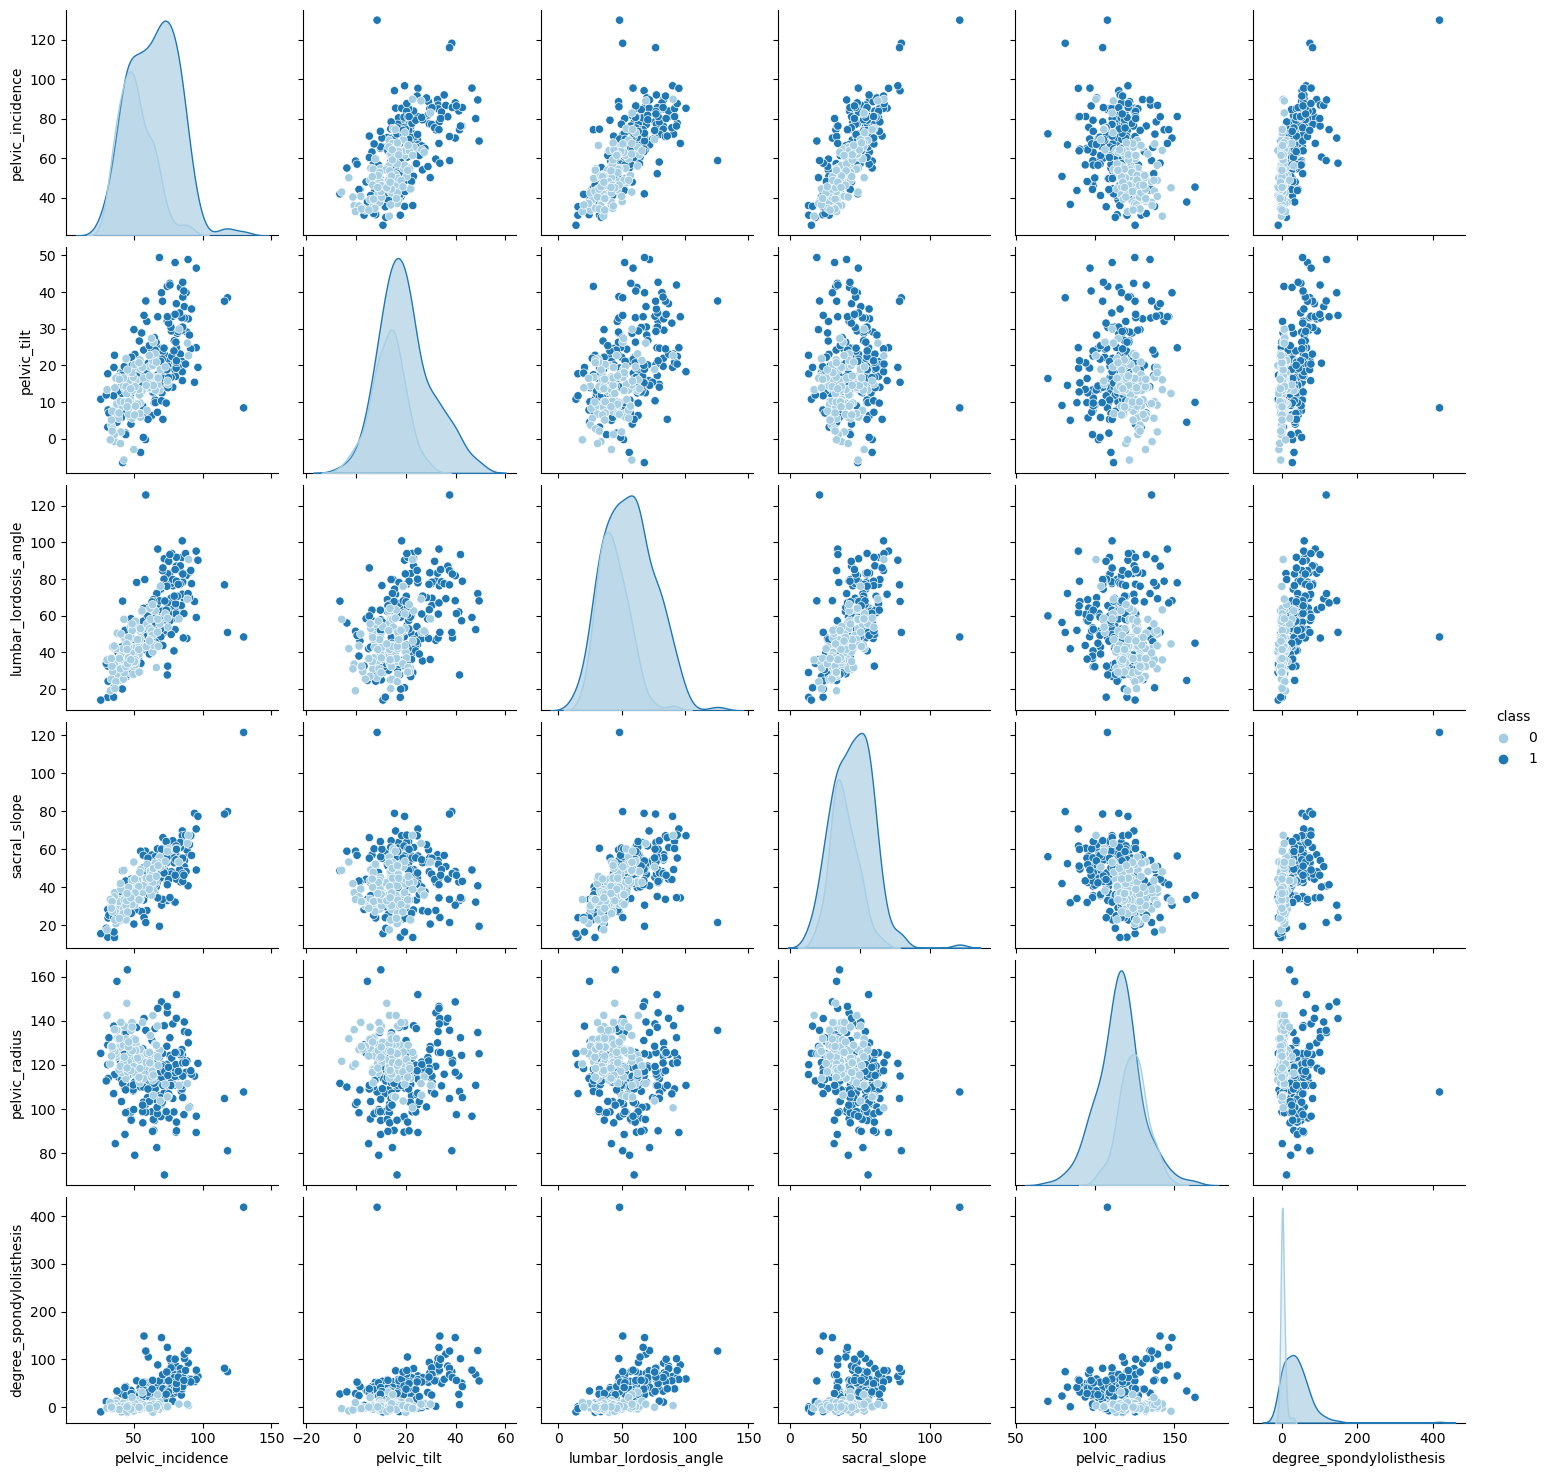

In [4]:
"""
Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.
"""

# set seaborn color pallete to paired

sns.set_palette("Paired")

# Scatter plot of data

sns.pairplot(data_frame, hue='class')
plt.show()

#### ii. Boxplots

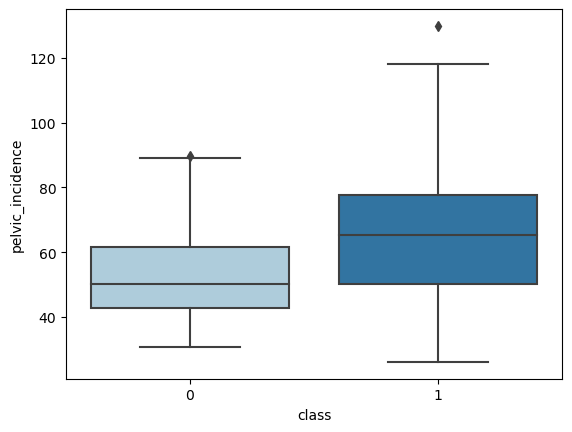

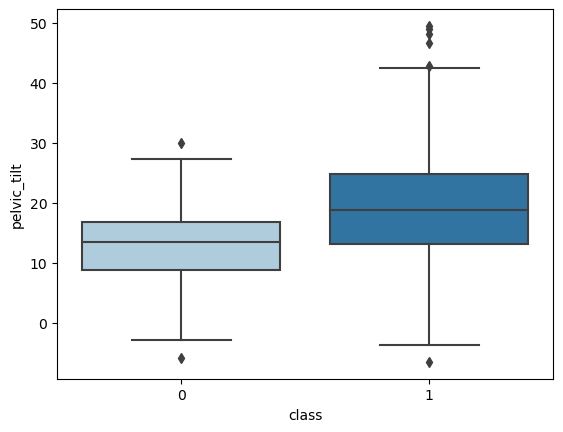

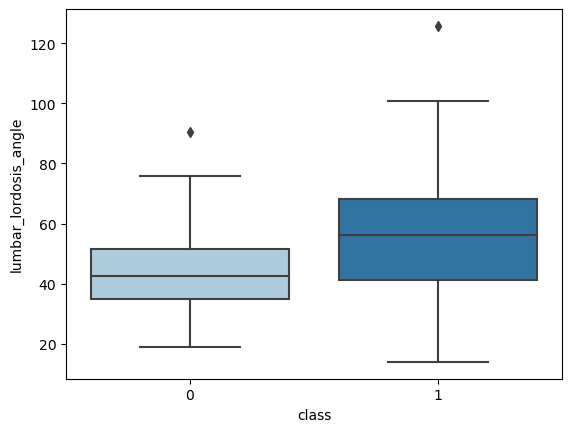

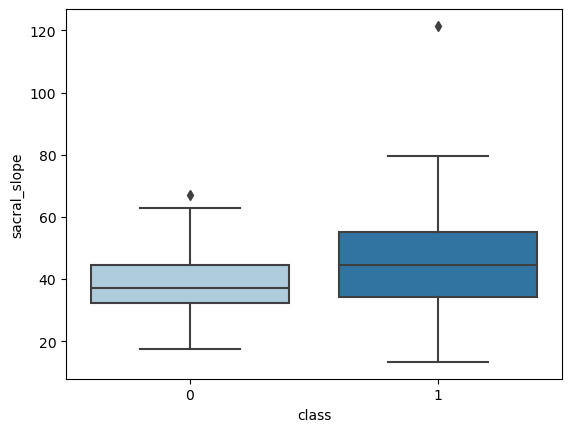

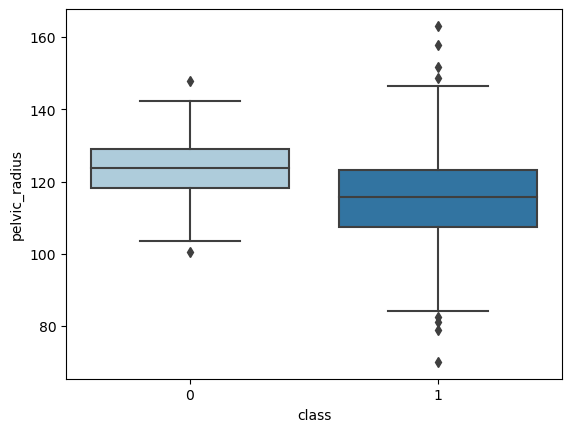

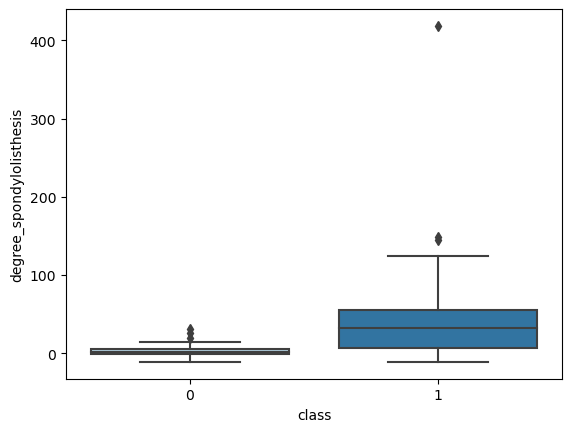

In [5]:
"""
Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1
"""

# Box plot of data for each class -- all columns vs class

for column in data_frame.columns:
    if column != 'class':
        sns.boxplot(x='class', y=column, data=data_frame)
        plt.show()

#### iii. Split Data Set

In [6]:
"""
Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.
"""

# Split the dataset into different classes
class_zero_data = data_frame[data_frame['class'] == 0]
class_one_data = data_frame[data_frame['class'] == 1]

# Split the dataset into training and testing sets
train_data = pd.concat([class_zero_data.iloc[:70], class_one_data.iloc[:140]])
test_data = pd.concat([class_zero_data.iloc[70:], class_one_data.iloc[140:]])

# Split the data into features and labels
x_train, y_train = train_data.drop('class', axis=1), train_data['class']
x_test, y_test = test_data.drop('class', axis=1), test_data['class']





### (c) Classification

#### i. Euclidean Metric

In [7]:
"""
Write code for k-nearest neighbors with Euclidean metric (or use a software
package).
"""

# Create a KNN classifier with k = 4

knn_classifier = KNeighborsClassifier(n_neighbors=4, metric='euclidean')

#### ii. Test Data

In [8]:
"""
Test all the data in the test database with k nearest neighbors. Take de-
cisions by majority polling. Plot train and test errors in terms of k for
k ∈ { 208, 205, . . . , 7, 4, 1,}(in reverse order). You are welcome to use 
smaller increments of k. Which k∗ is the most suitable k among those values? 
Calculate the confusion matrix, true positive rate, true negative rate, 
precision, and F1-score when k = k∗.2
"""

knn_classifier.fit(x_train, y_train.values.ravel())
knn_classifier.score(x_test,y_test)


0.94

In [9]:
# List to store the minimum training error
min_train_error = []

# Range of k values
k_values = np.arange(208, 0, -3)

test_errors = []
train_errors = []

# Find the optimal k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    knn.fit(x_train, y_train)
    
    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)
    
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

optimal_k = k_values[np.argmin(test_errors)]

min_train_error.append({
    'Description': 'C_2_euclidean',
    'Min_Train_Error': min(train_errors),
    'Min_Test_Error': min(test_errors)
})

# Display the results
print(f"Optimal k value: {optimal_k} with test error rate: {min(test_errors)}")


Optimal k value: 4 with test error rate: 0.06000000000000005


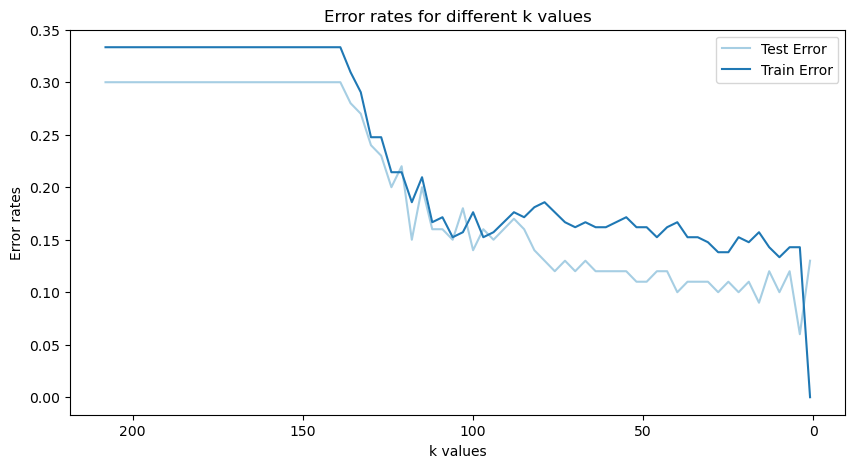

In [10]:

# Plot the error rates
plt.figure(figsize=(10, 5))
plt.plot(k_values, test_errors, label='Test Error')
plt.plot(k_values, train_errors, label='Train Error')
plt.gca().invert_xaxis()
plt.xlabel('k values')
plt.ylabel('Error rates')
plt.title('Error rates for different k values')
plt.legend()
plt.show()


In [11]:

# Display the metrics for the optimal k value
knn = KNeighborsClassifier(n_neighbors=optimal_k, p=2, metric='euclidean')
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print(f"Confusion Matrix: \n{confusion_matrix(y_test, predictions)}")
print(f"True Positive Rate: {tp / (tp + fn)}")
print(f"True Negative Rate: {tn / (tn + fp)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions)}")

Confusion Matrix: 
[[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
F1 Score: 0.9583333333333333
Precision Score: 0.9324324324324325


#### iii. Learning Curve

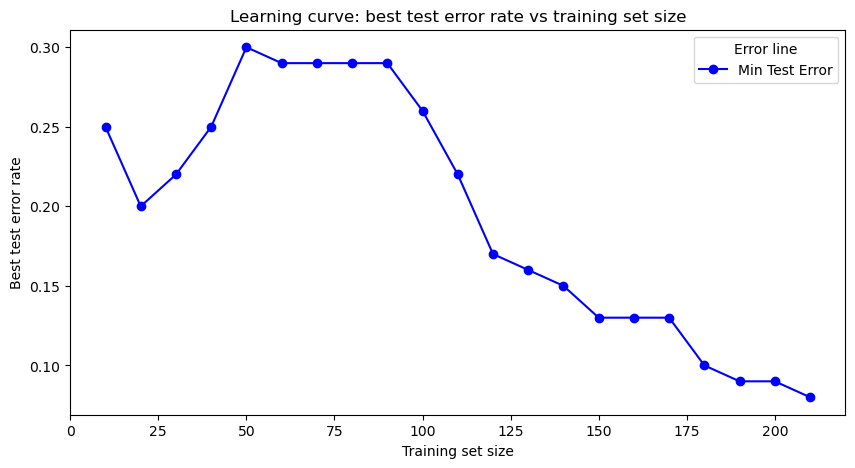

In [12]:
"""
Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate, 3 which
is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . ,210}.4

Note: for each N, select your training set by choosing the first b [N/3] c rows 
of Class 0 and the first N − [N/3] c rows of Class 1 in the training set you created '
in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, 
increasing by 5. For example, if N = 200, the optimal k is selected from
{1, 6, 11, . . . , 196}. This plot is called a Learning Curve.
"""

# Find the best test error rate for different training set sizes
training_sizes = np.arange(10, 220, 10)
optimal_k_values = np.arange(1, 197, 5)

best_test_errors = []
best_train_errors = []

for size in training_sizes:
    class_zero_size = int(size / 3)
    class_one_size = size - class_zero_size
    
    training_data = pd.concat([class_zero_data.iloc[:class_zero_size], class_one_data.iloc[:class_one_size]])
    testing_data = test_data

    x_train, y_train = training_data.drop('class', axis=1), training_data['class']
    x_test, y_test = testing_data.drop('class', axis=1), testing_data['class']

    test_errors = []
    train_errors = []

    for k in optimal_k_values:
        if k < size:
            knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
            knn.fit(x_train, y_train)
            
            train_pred = knn.predict(x_train)
            test_pred = knn.predict(x_test)
            
            train_error = 1 - accuracy_score(y_train, train_pred)
            test_error = 1 - accuracy_score(y_test, test_pred)
            
            train_errors.append(train_error)
            test_errors.append(test_error)
    
    best_test_errors.append(min(test_errors))
    best_train_errors.append(min(train_errors))

# Store the minimum training error
min_train_error.append({
    'Description': 'c_3_TrainingSetSize', 
    'Min_Train_Error': min(best_train_errors), 
    'Min_Test_Error': min(best_test_errors)
})

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(training_sizes, best_test_errors, marker='o', linestyle='-', color='b')
plt.xlabel('Training set size')
plt.ylabel('Best test error rate')
plt.title('Learning curve: best test error rate vs training set size')
plt.legend( title='Error line', loc='upper right', labels=['Min Test Error'])
plt.show()


### (d) Other Metrics

In [13]:
"""
Replace the Euclidean metric with the following metrics 5 and test them. Sum-
marize the test errors (i.e., when k = k∗) in a table. Use all of your training data
and select the best k when {1, 6, 11, . . . , 196}
"""


'\nReplace the Euclidean metric with the following metrics 5 and test them. Sum-\nmarize the test errors (i.e., when k = k∗) in a table. Use all of your training data\nand select the best k when {1, 6, 11, . . . , 196}\n'

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [14]:
error_report_test=[]
min_error_train = []

error_test = []
error_train = []
k_val = []
k_sequence = np.arange(1, 197, 5)
idx = 0

while idx < len(k_sequence):
    k = k_sequence[idx]
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_clf.fit(x_train, y_train)
    pred_y = knn_clf.predict(x_test)
    pred_y_train = knn_clf.predict(x_train)
    error_test.append(1 - accuracy_score(y_test, pred_y))  
    error_train.append(1 - accuracy_score(y_train, pred_y_train))
    k_val.append(k)
    idx += 1

minimum_error_d1 = min(error_test)
index = error_test.index(minimum_error_d1)
best_k_d1 = k_val[index]

error_report_test.append({'distance': 'manhattan', 'min_error': minimum_error_d1, 'k_value': best_k_d1})

min_error_train.append({'description': 'd_1_a_manhattan', 'min_train_error': min(error_train), 'min_test_error': minimum_error_d1})

print('Optimal k is', best_k_d1, 'with minimum error:', minimum_error_d1)


Optimal k is 1 with minimum error: 0.10999999999999999


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [15]:

error_test = []
error_train = []
k_val = []
k_sequence = np.arange(0.1, 1.1, 0.1)
idx = 0

while idx < len(k_sequence):
    k = k_sequence[idx]
    knn_clf = KNeighborsClassifier(n_neighbors=1, p=pow(10, k))
    knn_clf.fit(x_train, y_train)
    pred_y = knn_clf.predict(x_test)
    pred_y_train = knn_clf.predict(x_train)
    error_test.append(1 - accuracy_score(y_test, pred_y))  
    error_train.append(1 - accuracy_score(y_train, pred_y_train))
    k_val.append(k)
    idx += 1

minimum_error_d2 = min(error_test)
index = error_test.index(minimum_error_d2)
best_k_d2 = k_val[index]

error_report_test.append({'distance': 'manhattan with log(p)', 'min_error': minimum_error_d2, 'k_value': best_k_d2})

min_error_train.append({'description': 'd_1_b_manhattan_log_p', 'min_train_error': min(error_train), 'min_test_error': minimum_error_d2})

print('Optimal k is', best_k_d2, 'with minimum error:', minimum_error_d2)


Optimal k is 0.7000000000000001 with minimum error: 0.10999999999999999


##### C. Chebyshev Distance With p -> infinity.

In [16]:
error_test = []
error_train = []
k_val = []
k_sequence = np.arange(1, 197, 5)
idx = 0

while idx < len(k_sequence):
    k = k_sequence[idx]
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=float('inf'))
    knn_clf.fit(x_train, y_train)
    pred_y = knn_clf.predict(x_test)
    pred_y_train = knn_clf.predict(x_train)
    error_test.append(1 - accuracy_score(y_test, pred_y))  
    error_train.append(1 - accuracy_score(y_train, pred_y_train))
    k_val.append(k)
    idx += 1

minimum_error_d3 = min(error_test)
index = error_test.index(minimum_error_d3)
best_k_d3 = k_val[index]

error_report_test.append({'distance': 'chebyshev', 'min_error': minimum_error_d3, 'k_value': best_k_d3})

min_error_train.append({'description': 'd_1_c_chebyshev', 'min_train_error': min(error_train), 'min_test_error': minimum_error_d3})

print('Optimal k is', best_k_d3, 'with minimum error:', minimum_error_d3)


Optimal k is 16 with minimum error: 0.07999999999999996


#### ii. Mahalanobis Distance.

In [17]:

error_test = []
error_train = []
k_val = []
si_matrix = np.linalg.pinv(x_train.cov())
k = 1

while k <= 197:
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': si_matrix})
    knn_clf.fit(x_train, y_train)
    pred_y = knn_clf.predict(x_test)
    pred_y_train = knn_clf.predict(x_train)
    error_test.append(1 - accuracy_score(y_test, pred_y)) 
    error_train.append(1 - accuracy_score(y_train, pred_y_train))
    k_val.append(k)
    k += 5

minimum_error_d4 = min(error_test)
index = error_test.index(minimum_error_d4)
best_k_d4 = k_val[index]
error_report_test.append({'distance': 'mahalanobis', 'min_error': minimum_error_d4, 'k_value': best_k_d4})

min_error_train.append({'description': 'd_2_mahalanobis', 'min_train_error': min(error_train), 'min_test_error': minimum_error_d4})

print('Optimal k is', best_k_d4, 'with minimum error:', minimum_error_d4)

Optimal k is 1 with minimum error: 0.15000000000000002


In [18]:
print('Summary of test errors and k values: ')
print("----------------------------------------------------")
error_report = pd.DataFrame(error_report_test)
error_report['min_error'] = error_report['min_error'] * 100
print(error_report)

Summary of test errors and k values: 
----------------------------------------------------
                distance  min_error  k_value
0              manhattan       11.0      1.0
1  manhattan with log(p)       11.0      0.7
2              chebyshev        8.0     16.0
3            mahalanobis       15.0      1.0


### (e) Weighted Decision

In [19]:
"""
The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance 
from the query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11,16, . . . , 196}
"""

error_report_weighted = []

error_test = []
error_train = []
k_list = []
k_range = np.arange(1, 197, 5)
for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean', weights='distance')
    knn_clf.fit(x_train, y_train)
    pred_y = knn_clf.predict(x_test)
    pred_y_train = knn_clf.predict(x_train)
    error_test.append(1 - accuracy_score(y_test, pred_y))
    error_train.append(1 - accuracy_score(y_train, pred_y_train))
    k_list.append(k)

min_error_w1 = min(error_test)
index = error_test.index(min_error_w1)
best_k_w1 = k_range[index]
error_report_weighted.append({'distance': 'euclidean', 'min_error': min_error_w1, 'k_value': best_k_w1})

min_error_train.append({'description': 'e_1_euclidean_weighted', 'min_train_error': min(error_train), 'min_test_error': min_error_w1})

print('Optimal k is', best_k_w1, 'with minimum error:', min_error_w1)


Optimal k is 6 with minimum error: 0.09999999999999998


In [20]:
# Manhattan distance with weights
test_err_manhattan = []
train_err_manhattan = []
k_values_manhattan = []
k_steps = np.arange(1, 197, 5)
for k_step in k_steps:
    knn_classifier_manhattan = KNeighborsClassifier(n_neighbors=k_step, p=1, weights='distance')
    knn_classifier_manhattan.fit(x_train, y_train)
    predictions_test = knn_classifier_manhattan.predict(x_test)
    predictions_train = knn_classifier_manhattan.predict(x_train)
    test_err_manhattan.append(1 - accuracy_score(y_test, predictions_test)) 
    train_err_manhattan.append(1 - accuracy_score(y_train, predictions_train))
    k_values_manhattan.append(k_step)
lowest_err_w2 = min(test_err_manhattan)
idx_w2 = test_err_manhattan.index(lowest_err_w2)
optimal_k_w2 = k_steps[idx_w2]
error_report_weighted.append({'distance': 'Manhattan', 'min_error': lowest_err_w2, 'k_value': optimal_k_w2})
min_error_train.append({'description': 'e_2_manhattan_weighted', 'min_train_error': min(train_err_manhattan), 'min_test_error': lowest_err_w2})

print('Optimal k is', optimal_k_w2, 'with minimum error:', lowest_err_w2)


Optimal k is 26 with minimum error: 0.09999999999999998


In [21]:
# Chebyshev distance with weights
test_err_chebyshev = []
train_err_chebyshev = []
k_values_chebyshev = []
k_steps_chebyshev = np.arange(1, 197, 5)
for k_step in k_steps_chebyshev:
    knn_classifier_chebyshev = KNeighborsClassifier(n_neighbors=k_step, p=float('inf'), metric='chebyshev', weights='distance')
    knn_classifier_chebyshev.fit(x_train, y_train)
    predictions_test = knn_classifier_chebyshev.predict(x_test)
    predictions_train = knn_classifier_chebyshev.predict(x_train)
    test_err_chebyshev.append(1 - accuracy_score(y_test, predictions_test)) 
    train_err_chebyshev.append(1 - accuracy_score(y_train, predictions_train))
    k_values_chebyshev.append(k_step)
lowest_err_w3 = min(test_err_chebyshev)
idx_w3 = test_err_chebyshev.index(lowest_err_w3)
optimal_k_w3 = k_steps_chebyshev[idx_w3]
error_report_weighted.append({'distance': 'chebyshev', 'min_error': lowest_err_w3, 'k_value': optimal_k_w3})
min_error_train.append({'description': 'e_3chebyshev_weighted', 'min_train_error': min(train_err_chebyshev), 'min_test_error': lowest_err_w3})

print('Optimal k is', optimal_k_w3, 'with minimum error:', lowest_err_w3)


Optimal k is 16 with minimum error: 0.10999999999999999


In [22]:
print("Best test error for weighted is :")
print("----------------------------------------------------")
res_weighted = pd.DataFrame(error_report_weighted)
best_k_val = max(res_weighted["k_value"])
min_error_val = min(res_weighted["min_error"])
print( "Best K value : " + str(best_k_val))
print("Best error: {:.2f}".format(min_error_val))


Best test error for weighted is :
----------------------------------------------------
Best K value : 26
Best error: 0.10


### (f) Training Error Rate

In [23]:
"""What is the lowest training error rate you achieved in this homework? """

print("Lowest training error rate achieved:")
print("----------------------------------------------------")
min_train_error_df = pd.DataFrame(min_train_error)
print(min_train_error_df)
min_error_train_df = pd.DataFrame(min_error_train)
print(min_error_train_df)
print("----------------------------------------------------")

print("Lowest training error rate achieved was 0.0 and lowest test error rate achieved was 0.06")

Lowest training error rate achieved:
----------------------------------------------------
           Description  Min_Train_Error  Min_Test_Error
0        C_2_euclidean              0.0            0.06
1  c_3_TrainingSetSize              0.0            0.08
              description  min_train_error  min_test_error
0         d_1_a_manhattan              0.0            0.11
1   d_1_b_manhattan_log_p              0.0            0.11
2         d_1_c_chebyshev              0.0            0.08
3         d_2_mahalanobis              0.0            0.15
4  e_1_euclidean_weighted              0.0            0.10
5  e_2_manhattan_weighted              0.0            0.10
6   e_3chebyshev_weighted              0.0            0.11
----------------------------------------------------
Lowest training error rate achieved was 0.0 and lowest test error rate achieved was 0.06
